In [95]:
# Mastodon ref:
#     code: https://gitlab.unimelb.edu.au/feit-comp90024/comp90024/-/tree/master/fission/functions/mharvester 
#     tutorial: https://gitlab.unimelb.edu.au/feit-comp90024/comp90024/-/tree/master/fission?ref_type=heads#mastodon-harvester
#     document: https://mastodonpy.readthedocs.io/en/stable/index.html

from mastodon import Mastodon
import json, time

# For initialization, some server/feature/operation does not need token, while for others, apply for token
m = Mastodon(
    api_base_url=f'https://mastodon.au'
    # use the url of the server such as https://aus.social for https://aus.social/explore
)

# Use timer or loop to achieve streaming harvester, be ware of the frequency
lastid = m.timeline(timeline='public', since_id=None, limit=1, remote=True)[0]['id']
time.sleep(10)
mastodon_data = m.timeline(timeline='public', since_id=lastid, remote=True)
for i in range(len(mastodon_data)):
    print(f"{mastodon_data[i].account.acct}: {mastodon_data[i].id}")
# while(1):
#     data = m.timeline(timeline='public', since_id=lastid, remote=True)
#     lastid = lastid if not data else data[-1]['id']
#     print(m.status(lastid))
#     time.sleep(1)

se38@nrw.social: 112332512798561581
FlipboardUK@flipboard.com: 112332512737198251
ScienceScholar@mastodon.social: 112332512733401389
bea@labyrinth.zone: 112332512722358465
bullivant@mastodon.ie: 112332512710117046
spoilertv@spoilertv.social: 112332512553217121
slyflourish@chirp.enworld.org: 112332512545891400
Thatmermaid_J@beige.party: 112332512481221783
apkmirror@mastodon.social: 112332512363064768
vooksdotnet@mastodon.social: 112332512353244086
Independent@press.coop: 112332512330570429
Independent@press.coop: 112332512262356144
pureausten@mastodon.art: 112332512261456047
Independent@press.coop: 112332512184332680
apkmirror@mastodon.social: 112332512158546596
reading_bot@mastodon.social: 112332512111178707


In [96]:
# BOM ref:
#     code: https://gitlab.unimelb.edu.au/feit-comp90024/comp90024/-/blob/master/fission/functions/wharvestersimple.py
#     tutorial: https://gitlab.unimelb.edu.au/feit-comp90024/comp90024/-/tree/master/fission?ref_type=heads#harvesting-requests
#     document: http://www.bom.gov.au/catalogue/observations/about-weather-observations.shtml

import json, requests

# This one should be enough to use, change the url to find more data
# For lastest data, check if the json format exists in the source of data
# For historical data, you can download the needed csv and process them
# Historical data example: https://reg.bom.gov.au/climate/dwo/IDCJDW3050.latest.shtml
bom_data = requests.get('http://reg.bom.gov.au/fwo/IDV60901/IDV60901.95936.json').json()['observations']['data']
for i in range(len(bom_data)):
    print(f"{bom_data[i]['local_date_time']} air_temp: {bom_data[i]['air_temp']}, wind_spd_kmh: {bom_data[i]['wind_spd_kmh']}")

26/01:00am air_temp: 12.5, wind_spd_kmh: 9
26/12:30am air_temp: 12.4, wind_spd_kmh: 6
26/12:00am air_temp: 12.5, wind_spd_kmh: 7
25/11:30pm air_temp: 12.8, wind_spd_kmh: 9
25/11:00pm air_temp: 12.8, wind_spd_kmh: 7
25/10:30pm air_temp: 13.2, wind_spd_kmh: 7
25/10:00pm air_temp: 13.3, wind_spd_kmh: 7
25/09:30pm air_temp: 13.8, wind_spd_kmh: 6
25/09:00pm air_temp: 13.9, wind_spd_kmh: 6
25/08:30pm air_temp: 14.2, wind_spd_kmh: 6
25/08:00pm air_temp: 14.5, wind_spd_kmh: 9
25/07:30pm air_temp: 14.5, wind_spd_kmh: 9
25/07:00pm air_temp: 14.6, wind_spd_kmh: 9
25/06:30pm air_temp: 14.6, wind_spd_kmh: 11
25/06:00pm air_temp: 14.6, wind_spd_kmh: 11
25/05:30pm air_temp: 14.5, wind_spd_kmh: 11
25/05:00pm air_temp: 14.7, wind_spd_kmh: 11
25/04:30pm air_temp: 15.5, wind_spd_kmh: 9
25/04:00pm air_temp: 15.2, wind_spd_kmh: 13
25/03:30pm air_temp: 14.9, wind_spd_kmh: 13
25/03:00pm air_temp: 15.5, wind_spd_kmh: 15
25/02:30pm air_temp: 15.5, wind_spd_kmh: 13
25/02:00pm air_temp: 15.4, wind_spd_kmh: 9
25/

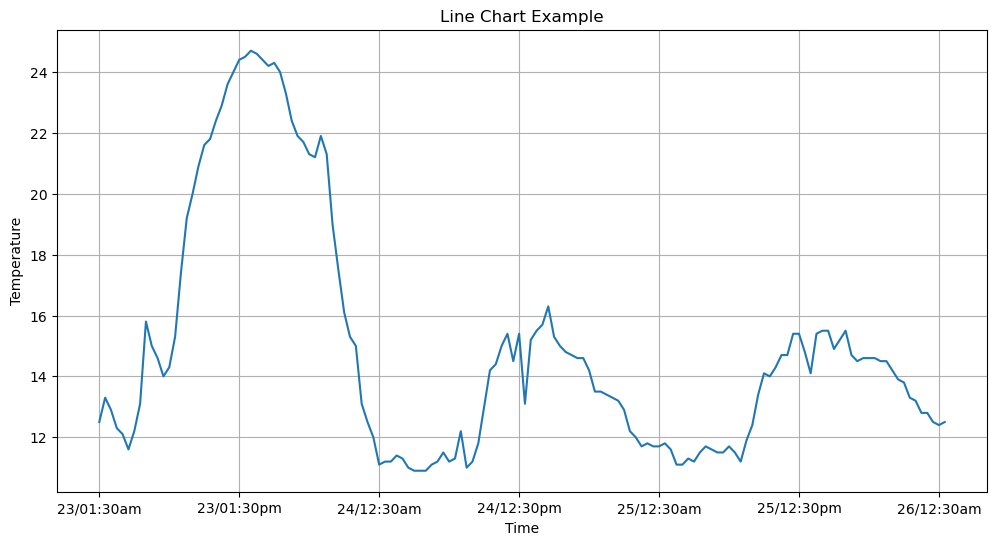

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

times = reversed([bom_data[i]['local_date_time'] for i in range(len(bom_data))])
air_temps = reversed([bom_data[i]['air_temp'] for i in range(len(bom_data))])
wind_spd_kmhs = reversed([bom_data[i]['wind_spd_kmh'] for i in range(len(bom_data))])

data = pd.DataFrame({'Time': times, 'Temperature': air_temps, 'Wind Speed(kmh)': wind_spd_kmhs})

plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Temperature', data=data)
plt.xlabel('Time')
x_ticks = plt.xticks()[0]
x_labels = plt.xticks()[1]
plt.xticks(x_ticks[::24], x_labels[::24])
plt.ylabel('Temperature')
plt.title('Line Chart Example')
plt.grid(True)
plt.show()

In [105]:
import requests

url = "https://gateway.api.epa.vic.gov.au/environmentMonitoring/v1/sites"
params = {"environmentalSegment": "air"}
headers = {
    'User-Agent': 'curl/8.4.0',
    'Cache-Control': 'no-cache',
    'X-API-Key': 'c3a1d847b44c4285b466f3e6751fffb5',
}

response = requests.get(url, params=params, headers=headers)

print(response.status_code)
print(response.text)

200
{
  "totalRecords" : 93,
  "records" : [
    {
      "siteID" : "77062cb7-3e3b-4984-b6d0-03dda76177f2",
      "siteName" : "Box Hill",
      "siteType" : "Standard",
      "geometry" : {
        "type" : "Point",
        "coordinates" : [
          -37.8287277,
          145.1324
        ]
      },
      "siteHealthAdvices" : [
        {
          "since" : "2024-04-25T14:00:00Z",
          "until" : "2024-04-25T15:00:00Z",
          "healthParameter" : "PM2.5",
          "averageValue" : 3.54,
          "unit" : "&micro;g/m&sup3;",
          "healthAdvice" : "Good",
          "healthAdviceColor" : "#42A93C",
          "healthCode" : "1021"
        }
      ]
    },
    {
      "siteID" : "c69ed768-34d2-4d72-86f3-088c250758a8",
      "siteName" : "Alphington",
      "siteType" : "Standard",
      "geometry" : {
        "type" : "Point",
        "coordinates" : [
          -37.7784081,
          145.0306
        ]
      },
      "siteHealthAdvices" : [
        {
          "since" : "

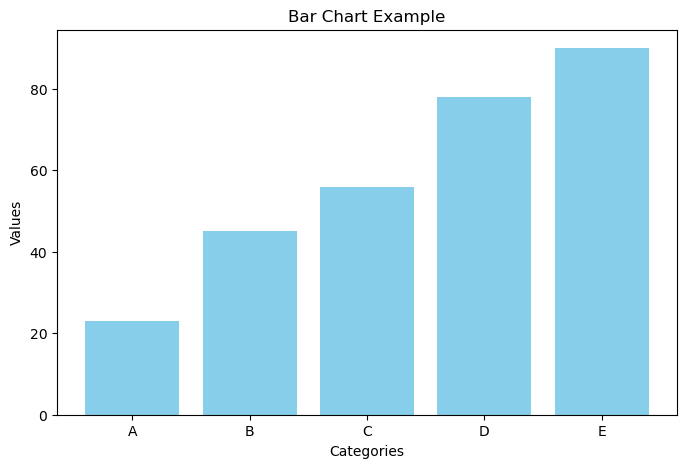

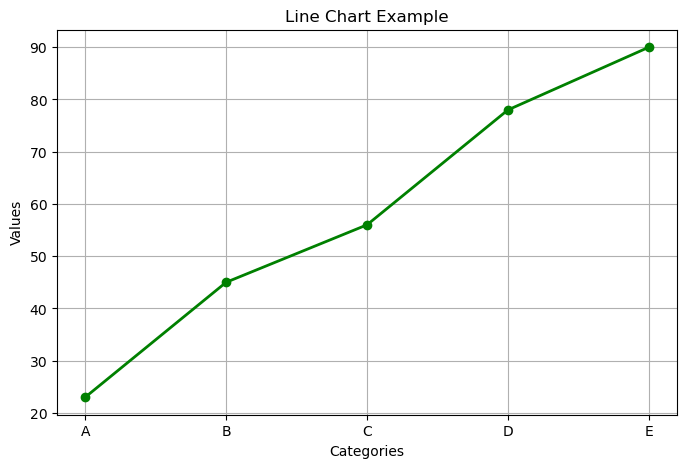

In [2]:
import matplotlib.pyplot as plt

# 示例数据
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 78, 90]

# 绘制柱状图
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart Example')
plt.show()

# 绘制折线图
plt.figure(figsize=(8, 5))
plt.plot(categories, values, marker='o', color='green', linestyle='-', linewidth=2)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Line Chart Example')
plt.grid(True)  # 添加网格线
plt.show()


In [98]:
import folium
from folium.plugins import HeatMap
import numpy as np

melbourne_center = [-37.8136, 144.9631]

m = folium.Map(location=melbourne_center, zoom_start=13, tiles='OpenStreetMap')

num_points = 200
np.random.seed(0)
data = np.array([np.random.uniform(low=-37.85, high=-37.75, size=num_points),
                 np.random.uniform(low=144.85, high=145.05, size=num_points)]).T

HeatMap(data).add_to(m)

m